<a href="https://colab.research.google.com/github/karthikstar/SC1015-Project/blob/main/SampleModelWalkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Walkthrough of Multi-Class COVID Classification Model


*Note: This is just a simple walkthrough to demonstrate how our model can predict chest xray images, based on the 3 classes - COVID, Viral Pneumonia, and Normal. 
For a detailed walkthrough, please check out our comprehensive notebook Multi_Class_COVID_Classification_Model_.ipynb
on our GitHub Repository.*

First, we will upload our saved model from our main notebook, which is stored on dropbox. Please run this on Google Colab for optimal performance.

In [1]:
#Unzip Dropbox file containg the model
!wget qq https://www.dropbox.com/s/8ro4seeax7ia7az/ModelAndBestWeights.zip
!unzip -qq ModelAndBestWeights.zip

--2022-04-24 13:28:54--  http://qq/
Resolving qq (qq)... failed: Name or service not known.
wget: unable to resolve host address ‘qq’
--2022-04-24 13:28:54--  https://www.dropbox.com/s/8ro4seeax7ia7az/ModelAndBestWeights.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/8ro4seeax7ia7az/ModelAndBestWeights.zip [following]
--2022-04-24 13:28:54--  https://www.dropbox.com/s/raw/8ro4seeax7ia7az/ModelAndBestWeights.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uceaad88b7c5298225f4a5b0e651.dl.dropboxusercontent.com/cd/0/inline/BkAvtLxLDcWbUjwLE9QxZKp6jPSpEMTVhhRj2mPfmmiQhAAcSIBvmt_NRt9zNlFx_6ohIlqCYr4_TIa5q5ITBp_VHvgBbPUYjyq6CKso6ukBy77tkpxaB1BUJdL5wQElHk3tNjxNo6Tx6b9zPHfHd-YXok7T0-iTQzqcXw6I11rT0Q/file# [following]


In [2]:
#getting required libraries
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np
import keras
from keras.models import Model,load_model,Sequential
from IPython.display import Image

In [3]:
#model function
def model(img_path):
  img = image.load_img(img_path, target_size=(299, 299))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  # x = preprocess_input(x)
  #print('Input image shape:', x.shape)
  model = load_model('./ModelAndBestWeights/pneumoniadetection_model.h5')
  pred = model.predict(x)
  #print('Predicted:', pred)

  #print(np.argmax(pred))
  print(img_path)
  result= np.argmax(pred)
  if result==0:
      print("Normal")
  elif result==1:
      print("Viral Pneumonia Detected ")
  elif result == 2:
    print("COVID-induced Pneumonia Detected")

#Visualising How Our Model Predicts COVID-19 induced Pneumonia

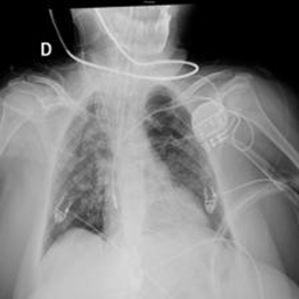

In [4]:
Image('./ModelAndBestWeights/images/COVID-1001.png') #Uploading a COVID Chest XRay

In [5]:
model('./ModelAndBestWeights/images/COVID-1001.png')

./ModelAndBestWeights/images/COVID-1001.png
COVID-induced Pneumonia Detected


#Visualising How Model Predicts Viral Pneumonia

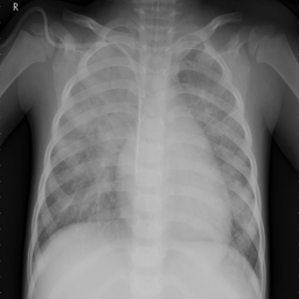

In [6]:
Image('./ModelAndBestWeights/images/Viral Pneumonia-1006.png') #Uploading a Viral Pneumonia Chest Xray

In [7]:
model('./ModelAndBestWeights/images/Viral Pneumonia-1006.png')

./ModelAndBestWeights/images/Viral Pneumonia-1006.png
Viral Pneumonia Detected 


#Visualising How Model Predicts Normal Chest XRay

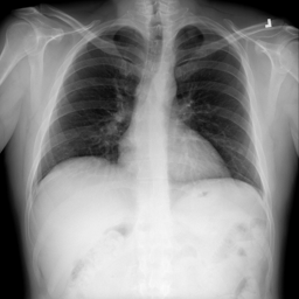

In [8]:
Image('./ModelAndBestWeights/images/Normal-10004.png') #Uploading a Normal Chest XRay

In [9]:
model('./ModelAndBestWeights/images/Normal-10004.png')

./ModelAndBestWeights/images/Normal-10004.png
Normal


As we have seen above, we hope this has given you a walkthrough of how our model has classifies Chest XRay Images into Normal, Viral Pneumonia and COVID Pneumonia. 
Feel free to play around by using the other sample images provided!